## <b>GAUSSIAN PROCESS REGRESSION<b>

### Authors, sources and references used in this example:
<br>
        Vincent Dubourg <vincent.dubourg@gmail.com><br>
        Jake Vanderplas <vanderplas@astro.washington.edu><br>
        Jan Hendrik Metzen <jhm@informatik.uni-bremen.de><br>
        Guillaume Lemaitre <g.lemaitre58@gmail.com><br>
License: BSD 3 clause <br>
https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html
<br><br>
Nando de Freitas<br>
https://www.youtube.com/watch?v=4vGiHC35j9s


In [18]:
# External dependencies

import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Simulate real data

X = np.linspace(start=0, stop=10, num=1_000)
y = np.squeeze(X *  np.sin(X))

[-4.74492726  7.73514288 -4.44491693 -1.90051689]


(-10.0, 10.0)

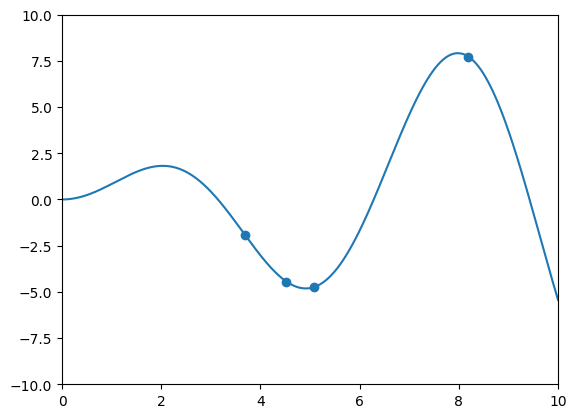

In [20]:
# Simulate observations (samples from the real data)

rng = np.random.RandomState(1)
#print(rng)

n_train = 4
# Training indices to later take some samples
training_indices = rng.choice(np.arange(y.size), size=n_train, replace=False)
#print(training_indices)

X_train, y_train = np.transpose(X[training_indices]), y[training_indices]
y_sigma = np.zeros(n_train)
print(y_train)

# Check simulated data and samples
plt.plot(X, y)
plt.scatter(training_indices/100, y[training_indices])
plt.xlim(0, 10)
plt.ylim(-10, 10)

In [21]:
# Define Gaussian kernel

def kernel (a, b, length, sigma):
    """
    GP Squared Exponential Kernel
    """
    #if len(a) != len(b):
    #    return

    # Source: https://www.youtube.com/watch?v=4vGiHC35j9s (Nando de Freitas)
    #sqdist = np.sum(a**2,1)reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a,b,T)
    #return np.exp(-.5 * sqdist)
    
    k = np.zeros((len(a),len(b)))
    for i in range(0, len(a)):
        for j in range(0, len(b)):
            #k[i, j] = np.exp(-.5 * (a[i]**2 - 2*a[i]*b[j] + b[j]**2))
            k[i, j] = sigma**2 * np.exp(-(a[j] - b[i])**2/(2*length**2))
            
    
    return k

In [22]:
# Compute kernel with existing observations

kernel_lenght = 1
kernel_sigma = 1

print(X_train)
K = kernel(X_train, X_train, kernel_lenght, kernel_sigma)

# Invert K to use in the estimation of mu
K_inv = np.linalg.pinv(K)
print(K)

# Initial values
X_points = X_train
y_points = y_train
y_sigmas = y_sigma
i = n_train
mean_prediction = y_train[0:n_train]
std_prediction = y_sigma

[5.07507508 8.18818819 4.52452452 3.68368368]
[[1.00000000e+00 7.86182409e-03 8.59372374e-01 3.79847660e-01]
 [7.86182409e-03 1.00000000e+00 1.21718347e-03 3.92609404e-05]
 [8.59372374e-01 1.21718347e-03 1.00000000e+00 7.02221316e-01]
 [3.79847660e-01 3.92609404e-05 7.02221316e-01 1.00000000e+00]]


In [23]:
print(y_train)

[-4.74492726  7.73514288 -4.44491693 -1.90051689]


In [24]:
# Initial Training

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
kernel_GP = 1 * RBF(length_scale=kernel_lenght)

gaussian_process = GaussianProcessRegressor(kernel=kernel_GP, optimizer=None)
gaussian_process.fit(X_train.reshape(-1, 1), y_train)
gaussian_process.kernel_


1**2 * RBF(length_scale=1)

### Return to this point an run again after last cell to add a new point (change index_new_sample)

In [65]:
# Add new observation and update observations

# Manually assign a new sample from simulated real data
#X_added = X[50]
##y_added = X_added *  np.sin(X_added)
#y_added = y[50]
#X = np.concatenate((X, [X_added]), axis=0)
#y = np.concatenate((y, [y_added]), axis=0)

# Manually assign a new sample, arbitrarily
index_new_sample = np.random.randint(0, 1000)
X_train_and_new_point = np.concatenate((X_train, [X[index_new_sample]]), axis=0)

X_points= np.concatenate((X_points, [X[index_new_sample]]), axis=0)
#####y_train_2 = np.concatenate((y_train, [3]), axis=0)

# Compute kernel with new added sample
K_2 = kernel(X_train_and_new_point, X_train_and_new_point, kernel_lenght, kernel_sigma)
#K_inv_2 = np.linalg.inv(K_2)
#print(K_2)

In [66]:
X_points

array([5.07507508, 8.18818819, 4.52452452, 3.68368368, 6.94694695,
       0.5005005 , 5.8958959 , 3.5035035 , 7.34734735])

In [67]:
print(X_train_and_new_point.shape)

(5,)


In [68]:
index_new_sample

734

In [69]:
# QC K matrices

K_star = K_2[-1,:-1]
K_star_star = K_2[-1,-1]
print(K_2)
print(K_inv)
print(K_star)
print(K_star_star)

[[1.00000000e+00 7.86182409e-03 8.59372374e-01 3.79847660e-01
  7.56520576e-02]
 [7.86182409e-03 1.00000000e+00 1.21718347e-03 3.92609404e-05
  7.02221316e-01]
 [8.59372374e-01 1.21718347e-03 1.00000000e+00 7.02221316e-01
  1.86079877e-02]
 [3.79847660e-01 3.92609404e-05 7.02221316e-01 1.00000000e+00
  1.21718347e-03]
 [7.56520576e-02 7.02221316e-01 1.86079877e-02 1.21718347e-03
  1.00000000e+00]]
[[ 6.1431694  -0.03966072 -7.18231935  2.71011079]
 [-0.03966072  1.00025885  0.04402263 -0.01588787]
 [-7.18231935  0.04402263 10.37008579 -4.55390982]
 [ 2.71011079 -0.01588787 -4.55390982  3.16842393]]
[0.07565206 0.70222132 0.01860799 0.00121718]
1.0


In [70]:
# Predict mu and sigme of new added sample (mu_star and sigma_star)
mu_star = np.dot((np.dot(K_star.T, K_inv)), y_train)
sigma_star = np.maximum(np.dot(((-1)*np.dot(K_star.T, K_inv)), K_star) + K_star_star, 0)

y_points = np.concatenate((y_points, [mu_star]), axis=0)
y_sigmas = np.concatenate((y_sigmas, [sigma_star]), axis=0)

print(mu_star)
print(y_points)

5.191597628111292
[-4.74492726e+00  7.73514288e+00 -4.44491693e+00 -1.90051689e+00
  2.97209334e+00  6.80945319e-03 -2.42561375e+00 -1.35459173e+00
  5.19159763e+00]


In [71]:
mean_prediction_temp, std_prediction_temp = gaussian_process.predict(X[index_new_sample].reshape(-1, 1), return_std=True)

mean_prediction = np.concatenate((mean_prediction, mean_prediction_temp), axis=0)
std_prediction = np.concatenate((std_prediction, std_prediction_temp), axis=0)

print(mean_prediction)
print(std_prediction)

[-4.74492726e+00  7.73514288e+00 -4.44491693e+00 -1.90051689e+00
  2.97209334e+00  6.80945318e-03 -2.42561375e+00 -1.35459173e+00
  5.19159763e+00]
[0.         0.         0.         0.         0.8402757  0.99994485
 0.48756414 0.08686062 0.70073013]


In [72]:
# Prepare Data for Plot

# Create array just to use in "Fill_between" plot, as order is needed
mu_sigma_vectors = np.array((X_points, y_points, y_sigmas))
mu_sigma_vectors = mu_sigma_vectors[:, np.argsort( mu_sigma_vectors[0])]

# Create array just to use in "Fill_between" plot, as order is needed
mu_sigma_vectors_GP = np.array((X_points, mean_prediction, std_prediction))
mu_sigma_vectors_GP = mu_sigma_vectors_GP[:, np.argsort( mu_sigma_vectors_GP[0])]

# Replace NaN to big values for plot

updated_y_points_for_plot = y_points
updated_y_points_for_plot[updated_y_points_for_plot<-50] = np.nan
updated_y_points_for_plot[updated_y_points_for_plot> 50] = np.nan

mu_sigma_vectors[1][mu_sigma_vectors[1]<-50] = np.nan
mu_sigma_vectors[1][mu_sigma_vectors[1]> 50] = np.nan

#mu_sigma_vectors_GP[1][mu_sigma_vectors_GP[1]<-50]=-np.nan
#mu_sigma_vectors_GP[1][mu_sigma_vectors_GP[1]> 50]= np.nan



In [73]:
updated_y_points_for_plot

array([-4.74492726e+00,  7.73514288e+00, -4.44491693e+00, -1.90051689e+00,
        2.97209334e+00,  6.80945319e-03, -2.42561375e+00, -1.35459173e+00,
        5.19159763e+00])

(-10.0, 10.0)

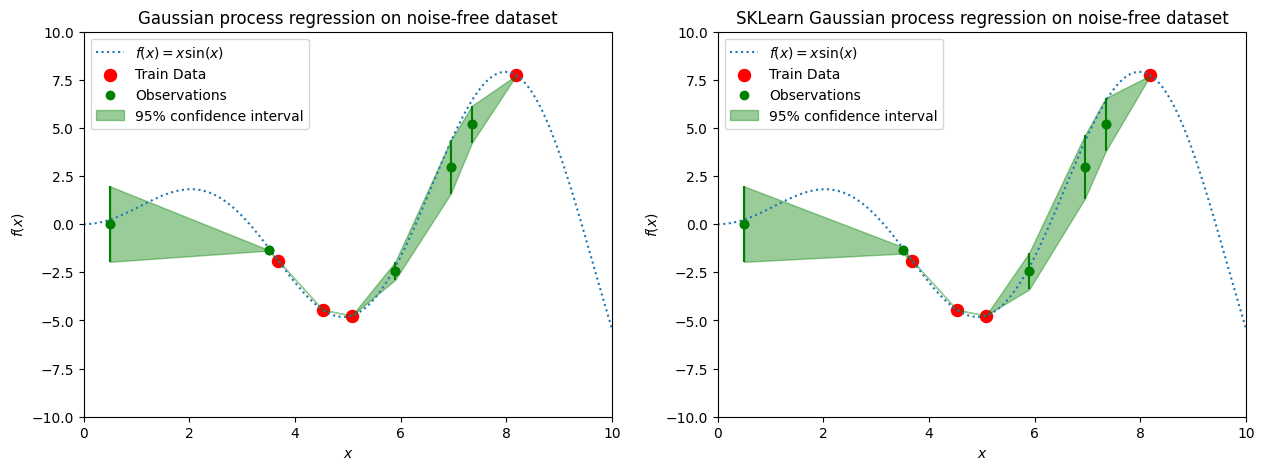

In [74]:
# PLOTS

# Manual GPR

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
ax1.scatter(X_train, y_train, label="Train Data", color='red', s=75)
ax1.scatter(X_points[n_train:], updated_y_points_for_plot[n_train:], label="Observations", color='green')
ax1.errorbar(X_points[n_train:], updated_y_points_for_plot[n_train:], 1.96*y_sigmas[n_train:], linestyle='None', marker='o', color='green')

ax1.fill_between(
    mu_sigma_vectors[0],
    mu_sigma_vectors[1] - 1.96 * mu_sigma_vectors[2],
    mu_sigma_vectors[1] + 1.96 * mu_sigma_vectors[2],
    alpha=0.4,
    label=r"95% confidence interval",
    color='green',
)

ax1.legend()
ax1.set_xlabel("$x$")
ax1.set_ylabel("$f(x)$")
_ = ax1.set_title("Gaussian process regression on noise-free dataset")

ax1.set_xlim(0, 10)
ax1.set_ylim(-10, 10)

# Scikit Learn

ax2.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
ax2.scatter(X_train, y_train, label="Train Data", color='red', s=75)
ax2.scatter(X_points[n_train:], mean_prediction[n_train:], label="Observations", color='green')
ax2.errorbar(X_points[n_train:], mean_prediction[n_train:], 1.96*std_prediction[n_train:], linestyle='None', marker='o', color='green')

ax2.fill_between(
    mu_sigma_vectors_GP[0],
    mu_sigma_vectors_GP[1] - 1.96 * mu_sigma_vectors_GP[2],
    mu_sigma_vectors_GP[1] + 1.96 * mu_sigma_vectors_GP[2],
    alpha=0.4,
    label=r"95% confidence interval",
    color='green',
)

ax2.legend()
ax2.set_xlabel("$x$")
ax2.set_ylabel("$f(x)$")
_ = ax2.set_title("SKLearn Gaussian process regression on noise-free dataset")

ax2.set_xlim(0, 10)
ax2.set_ylim(-10, 10)